In [1]:
import numpy as np
import pandas as pd
import glob, os    

# visualisation
import matplotlib.pyplot as plt

In [2]:
# combine all csv electricity datas
# merged into one csv file

path = r'dataset/'

all_files = glob.glob(path + "/electricity_data/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

electricity_data = pd.concat(li, axis=0, ignore_index=True)
electricity_data.to_csv( "electricity_data_2019_2020.csv", index=False, encoding='utf-8-sig')

In [3]:
# Generate new csv for electricity_data_2019_2020
electricity_data_2019_2020 = pd.read_csv("dataset/electricity_data_2019_2020.csv", index_col=None, header=0)
electricity_data_2019_2020

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2019/02/01 00:30:00,4012.27,100.97,TRADE
1,VIC1,2019/02/01 01:00:00,3879.38,86.00,TRADE
2,VIC1,2019/02/01 01:30:00,3810.66,113.73,TRADE
3,VIC1,2019/02/01 02:00:00,3683.81,95.01,TRADE
4,VIC1,2019/02/01 02:30:00,3656.39,82.59,TRADE
...,...,...,...,...,...
29227,VIC1,2020/02/29 22:00:00,4338.92,48.74,TRADE
29228,VIC1,2020/02/29 22:30:00,4259.62,48.34,TRADE
29229,VIC1,2020/02/29 23:00:00,4293.57,45.76,TRADE
29230,VIC1,2020/02/29 23:30:00,4487.10,65.20,TRADE


In [4]:
print (df['TOTALDEMAND'].mean())
print (df['TOTALDEMAND'].min())
print (df['TOTALDEMAND'].max())

4763.386903735633
3466.48
7644.42


In [5]:
print (df['RRP'].mean())
print (df['RRP'].min())
print (df['RRP'].max())

48.3059051724138
-9.73
251.2


In [6]:
# Filter less demanding electricity usage hours
less_electricity_demand = df[df['TOTALDEMAND']<4763]
less_electricity_demand

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
42,VIC1,2020/02/01 21:30:00,4702.29,27.60,TRADE
43,VIC1,2020/02/01 22:00:00,4600.66,59.24,TRADE
44,VIC1,2020/02/01 22:30:00,4390.56,69.61,TRADE
45,VIC1,2020/02/01 23:00:00,4387.98,77.01,TRADE
46,VIC1,2020/02/01 23:30:00,4580.60,59.13,TRADE
...,...,...,...,...,...
1387,VIC1,2020/02/29 22:00:00,4338.92,48.74,TRADE
1388,VIC1,2020/02/29 22:30:00,4259.62,48.34,TRADE
1389,VIC1,2020/02/29 23:00:00,4293.57,45.76,TRADE
1390,VIC1,2020/02/29 23:30:00,4487.10,65.20,TRADE


In [7]:
extracted_hours = less_electricity_demand['SETTLEMENTDATE'].str.partition()
hours = pd.DataFrame({'Hours': extracted_hours[2].str.split().str[-1]})
hours

,Hours
42,21:30:00
43,22:00:00
44,22:30:00
45,23:00:00
46,23:30:00
...,...
1387,22:00:00
1388,22:30:00
1389,23:00:00
1390,23:30:00


In [8]:
hours_freq = hours.value_counts()
hours_freq

Hours   
23:00:00    28
01:30:00    28
02:00:00    28
02:30:00    28
03:00:00    28
03:30:00    28
04:00:00    28
04:30:00    28
05:00:00    28
00:30:00    27
01:00:00    27
05:30:00    25
23:30:00    23
00:00:00    23
22:30:00    23
22:00:00    21
21:30:00    19
12:00:00    18
14:30:00    17
14:00:00    17
13:30:00    17
13:00:00    17
12:30:00    17
11:30:00    16
15:00:00    16
15:30:00    15
11:00:00    15
10:30:00    15
16:00:00    14
06:00:00    13
16:30:00    11
10:00:00    11
09:30:00    10
09:00:00     9
21:00:00     9
08:30:00     8
07:30:00     8
08:00:00     8
06:30:00     8
07:00:00     8
17:00:00     7
17:30:00     5
18:00:00     4
20:30:00     4
19:30:00     3
20:00:00     3
19:00:00     3
18:30:00     2
dtype: int64

In [9]:
sorted_hours = hours_freq.sort_index()
sorted_hours

Hours   
00:00:00    23
00:30:00    27
01:00:00    27
01:30:00    28
02:00:00    28
02:30:00    28
03:00:00    28
03:30:00    28
04:00:00    28
04:30:00    28
05:00:00    28
05:30:00    25
06:00:00    13
06:30:00     8
07:00:00     8
07:30:00     8
08:00:00     8
08:30:00     8
09:00:00     9
09:30:00    10
10:00:00    11
10:30:00    15
11:00:00    15
11:30:00    16
12:00:00    18
12:30:00    17
13:00:00    17
13:30:00    17
14:00:00    17
14:30:00    17
15:00:00    16
15:30:00    15
16:00:00    14
16:30:00    11
17:00:00     7
17:30:00     5
18:00:00     4
18:30:00     2
19:00:00     3
19:30:00     3
20:00:00     3
20:30:00     4
21:00:00     9
21:30:00    19
22:00:00    21
22:30:00    23
23:00:00    28
23:30:00    23
dtype: int64

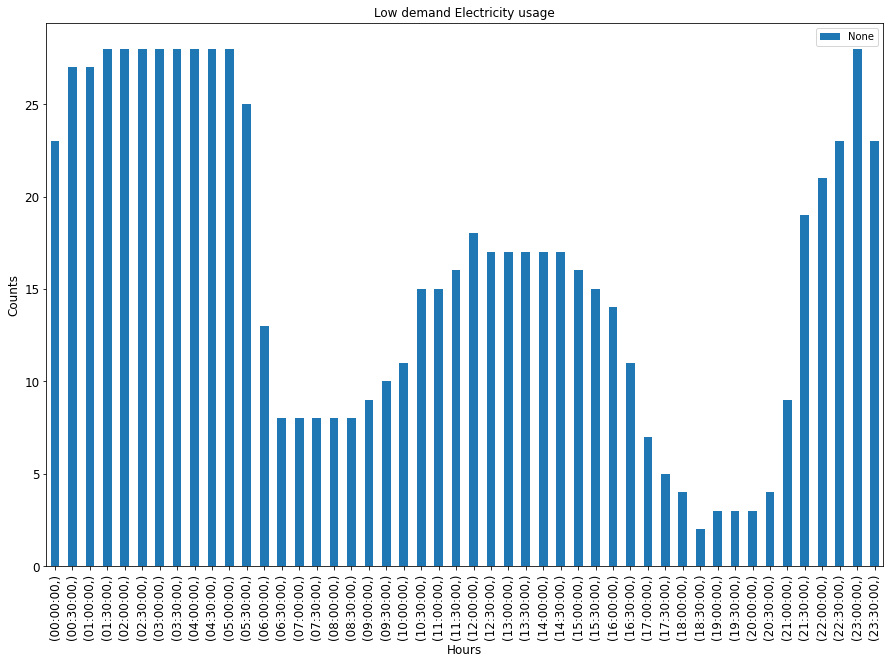

In [10]:
ax = sorted_hours.plot(kind='bar', title ="Low demand Electricity usage", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Hours", fontsize=12)
ax.set_ylabel("Counts", fontsize=12)
plt.show()

In [15]:
# Filter less demanding electricity usage hours
less_electricity_rrp = df[df['RRP']<48]
less_electricity_rrp

extracted_hours_rrp = less_electricity_rrp['SETTLEMENTDATE'].str.partition()
hours_rrp = pd.DataFrame({'Hours': extracted_hours_rrp[2].str.split().str[-1]})
hours_rrp

,Hours
2,01:30:00
3,02:00:00
4,02:30:00
5,03:00:00
6,03:30:00
...,...
1371,14:00:00
1372,14:30:00
1373,15:00:00
1374,15:30:00


In [16]:
hours_rrp_freq = hours_rrp.value_counts()
hours_rrp_freq
sorted_hours_rpp = hours_rrp_freq.sort_index()
sorted_hours_rpp


Hours   
00:00:00    15
00:30:00    19
01:00:00    22
01:30:00    25
02:00:00    28
02:30:00    27
03:00:00    28
03:30:00    27
04:00:00    29
04:30:00    29
05:00:00    24
05:30:00    15
06:00:00    10
06:30:00     6
07:00:00     7
07:30:00    12
08:00:00    16
08:30:00    13
09:00:00    14
09:30:00    14
10:00:00    15
10:30:00    15
11:00:00    17
11:30:00    18
12:00:00    18
12:30:00    20
13:00:00    21
13:30:00    21
14:00:00    17
14:30:00    15
15:00:00    14
15:30:00    13
16:00:00    11
16:30:00    13
17:00:00    12
17:30:00    11
18:00:00    10
18:30:00     7
19:00:00     6
19:30:00     6
20:00:00     6
20:30:00    10
21:00:00    14
21:30:00    17
22:00:00    21
22:30:00    16
23:00:00    18
23:30:00    12
dtype: int64

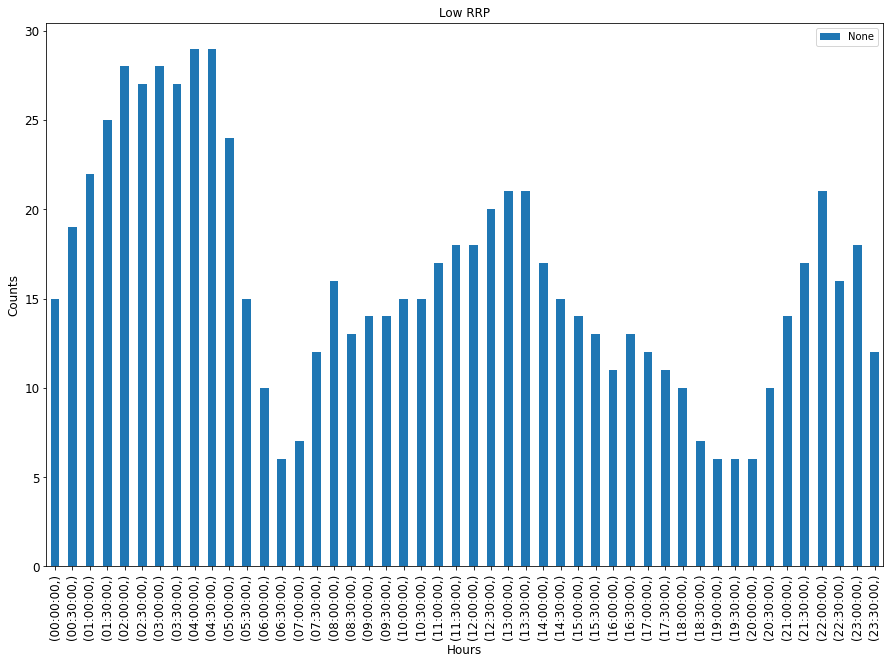

In [17]:
ay = sorted_hours_rpp.plot(kind='bar', title ="Low RRP", figsize=(15, 10), legend=True, fontsize=12)
ay.set_xlabel("Hours", fontsize=12)
ay.set_ylabel("Counts", fontsize=12)
plt.show()

In [18]:
sorted_hours_rpp.corr(sorted_hours)

0.8495408583956677

In [19]:
electricity_data_2019_2020

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2019/02/01 00:30:00,4012.27,100.97,TRADE
1,VIC1,2019/02/01 01:00:00,3879.38,86.00,TRADE
2,VIC1,2019/02/01 01:30:00,3810.66,113.73,TRADE
3,VIC1,2019/02/01 02:00:00,3683.81,95.01,TRADE
4,VIC1,2019/02/01 02:30:00,3656.39,82.59,TRADE
...,...,...,...,...,...
29227,VIC1,2020/02/29 22:00:00,4338.92,48.74,TRADE
29228,VIC1,2020/02/29 22:30:00,4259.62,48.34,TRADE
29229,VIC1,2020/02/29 23:00:00,4293.57,45.76,TRADE
29230,VIC1,2020/02/29 23:30:00,4487.10,65.20,TRADE


In [20]:
electricity_data_2019_2020['TOTALDEMAND'].corr(electricity_data_2019_2020['RRP'])

0.21739141481148244